# 2.2.7 Challenge: Feedback analysis

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Grab and process the raw data.
data_path = ("C:/Personal/09142640/Desktop/Useful docs/Data science/amazon_sentiment.txt")
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)

In [69]:
sms_raw.columns=["Text","Sentiments"]


# Positive Statements

In [61]:
positive_keywords = ['seamlessly','satisfied', 'happy', 'enjoyed', 'loved', 'prompt', 'great', 'excellent', 'favorite','good','amazing', 'delicious', 'right', 'love','like','recommended']
negative_keywords = ['angry', 'slow', 'sucks', 'bad', 'disappointed', 'rude', 'avoid', 'never', 'waste','never', 'mistake', 'not good', 'not like', 'zero', 'dirty', 'bland','disaster','downside', 'joke']

In [70]:
for key in positive_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.Text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

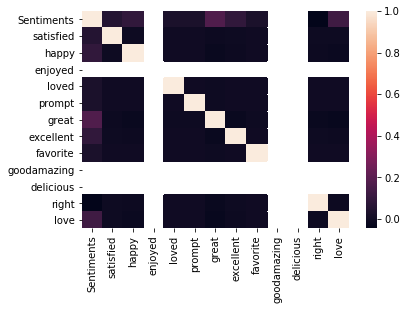

In [17]:
sns.heatmap(sms_raw.corr())

In [71]:
data = sms_raw[positive_keywords]
target = sms_raw['Sentiments']


In [59]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of unmatched positive statements out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of unmatched positive statements out of a total 1001 points : 399


# Negative Statements

In [72]:
for key in negative_keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.Text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

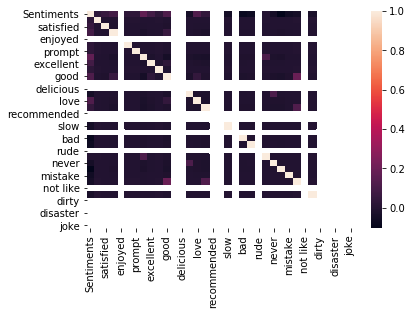

In [73]:
sns.heatmap(sms_raw.corr())

In [74]:
data_negative = sms_raw[negative_keywords]
target_negative = sms_raw['Sentiments']


In [75]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_negative, target_negative)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_negative)

# Display our results.
print("Number of unmatched negative statements out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of unmatched negative statements out of a total 1001 points : 468
